## Links for datasets:
https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature

https://www.kaggle.com/datasets/kukuroo3/body-performance-data

# Hyperparameter Tunning


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


# Classification Dataset Explore

In [4]:
body_df=pd.read_csv("data/bodyPerformance.csv")
null_values=body_df.isnull().sum()
print("Null Values in Body Performance Dataset:",null_values)


Null Values in Body Performance Dataset: age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


In [6]:
body_df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [5]:
def encode_object_columns(df):
    obj_cols=df.select_dtypes(include=["object"]).columns
    for col in obj_cols:
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])
    return df

df=encode_object_columns(body_df)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [6]:
def corr_matrix(df,target_col):
    corr_matrix=df.corr()[target_col].abs().sort_values(ascending=False)
    return corr_matrix

correlation_matrix=corr_matrix(body_df,"class")
correlation_matrix

class                      1.000000
sit and bend forward_cm    0.588123
sit-ups counts             0.452832
body fat_%                 0.341956
broad jump_cm              0.262154
weight_kg                  0.214129
gripForce                  0.136088
gender                     0.075605
diastolic                  0.066761
age                        0.065612
height_cm                  0.037753
systolic                   0.035484
Name: class, dtype: float64

In [6]:
X_clf=body_df.drop(columns=["class"])
y_clf=body_df["class"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42)

## KNN (Classification) on the X-axis and the model’s accuracy on the Y-axis

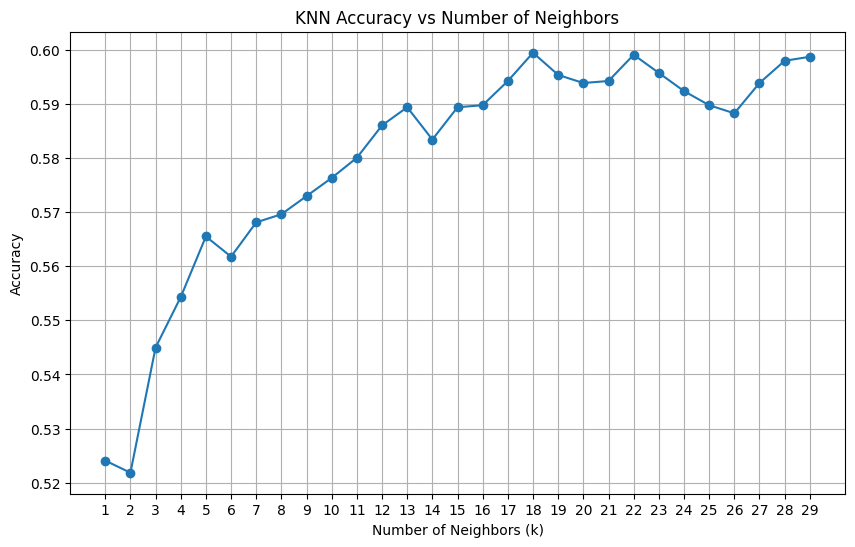

In [7]:
def neighbors_and_accuracy(X_train, y_train, X_test, y_test):
    k_values = range(1, 30)
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, marker='o')
    plt.title("KNN Accuracy vs Number of Neighbors")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Accuracy")
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

neighbors_and_accuracy(X_train_clf, y_train_clf, X_test_clf, y_test_clf)



#### A general fact about accuracy and the number of neighbors is that they are directly proportional.Of course exists points where should not be decrease but I think it depends on neighbors data,may be that data are a little different from rest dataset(small outliers)

# Regression Dataset Explore

In [7]:
motor_df=pd.read_csv("data/motor_temperature.csv")
null_values=motor_df.isnull().sum()
print("Null Values in Motor Temperature Dataset:",null_values)

Null Values in Motor Temperature Dataset: u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64


In [16]:
motor_df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


In [10]:
motor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [8]:
regression_correlation_matrix=corr_matrix(motor_df,"torque")
regression_correlation_matrix

torque            1.000000
i_q               0.996457
u_d               0.753779
profile_id        0.321773
ambient           0.315747
i_d               0.274097
coolant           0.257982
u_q               0.136215
pm                0.117138
stator_yoke       0.117118
stator_winding    0.095510
motor_speed       0.043903
stator_tooth      0.018413
Name: torque, dtype: float64

In [9]:
X_reg=motor_df.drop(columns=["torque"])
y_reg=motor_df["torque"]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

## KNN (Regression version) on the X-axis and the MSE of the model on the Y-axis

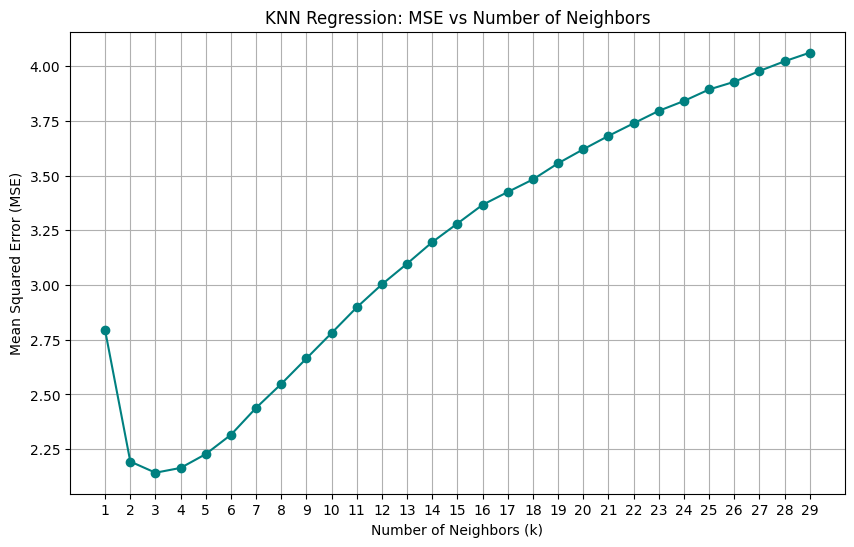

In [101]:
def neighbors_and_mse(X_train_reg, y_train_reg, X_test_reg, y_test_reg):
    k_values = range(1, 30)
    mse_values = []

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_reg, y_train_reg)
        y_pred = knn.predict(X_test_reg)
        mse = mean_squared_error(y_test_reg, y_pred)
        mse_values.append(mse)

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, mse_values, marker='o', color='teal')
    plt.title("KNN Regression: MSE vs Number of Neighbors")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

neighbors_and_mse(X_train_reg, y_train_reg, X_test_reg, y_test_reg)

#### When k is small (e.g. k=1): MSE is relatively large (about 2.75). This indicates that when the model is based on a single neighbor, it is very sensitive to noise in the training data. Too small a k can lead to overfitting, where the model learns too much about the specific details of the training data but does not generalize well to new data.

# ***Tree Decission Classifier***

In [10]:
def plot_tree_heatmap_body(X_train, X_test, y_train, y_test,
                            max_depth_range, max_features_range,
                            task='classification', criterion='gini',
                            random_state=42):

    results = np.zeros((len(max_features_range), len(max_depth_range)))

    for i, max_feat in enumerate(max_features_range):
        for j, max_d in enumerate(max_depth_range):
            if task == 'classification':
                model = DecisionTreeClassifier(criterion=criterion, max_depth=max_d,
                                               max_features=max_feat, random_state=random_state)
            else:
                model = DecisionTreeRegressor(criterion=criterion, max_depth=max_d,
                                              max_features=max_feat, random_state=random_state)

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            score = (accuracy_score(y_test, y_pred) if task == 'classification'
                     else mean_squared_error(y_test, y_pred))
            results[i, j] = score



    plt.figure(figsize=(12, 6))
    cmap = "viridis" if task == 'classification' else "mako"
    sns.heatmap(results,
                xticklabels=list(max_depth_range),
                yticklabels=list(max_features_range),
                annot=True, fmt=".3f", cmap=cmap)

    plt.title(f"{task.capitalize()} - Criterion: {criterion} - {'Accuracy' if task == 'classification' else 'MSE'} Heatmap")
    plt.xlabel("Max Depth")
    plt.ylabel("Max Features")
    plt.show()


## 1. Classification - criterion='gini'

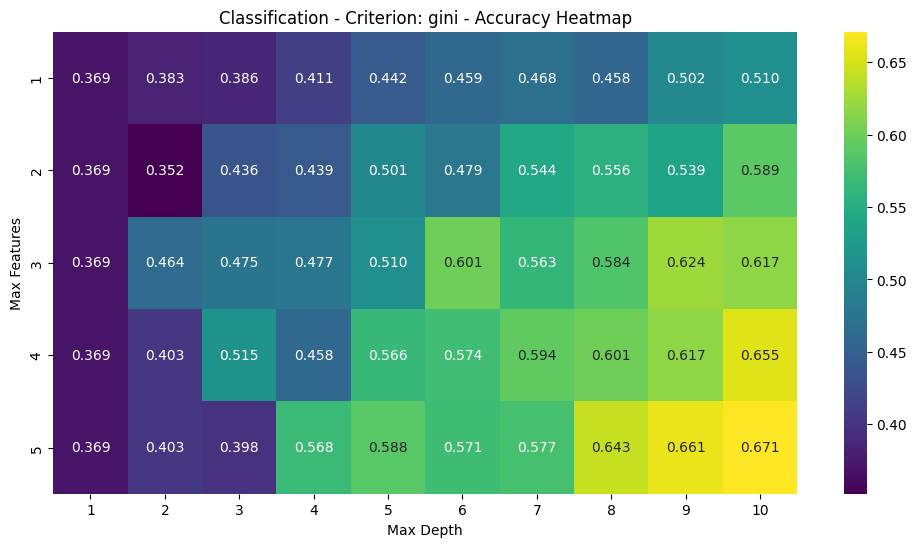

In [103]:
plot_tree_heatmap_body(X_train_clf, X_test_clf, y_train_clf, y_test_clf,
                       max_depth_range=range(1, 11),
                       max_features_range=range(1, 6),
                       task='classification',
                       criterion='gini')


## 2. Classification - criterion='entropy'

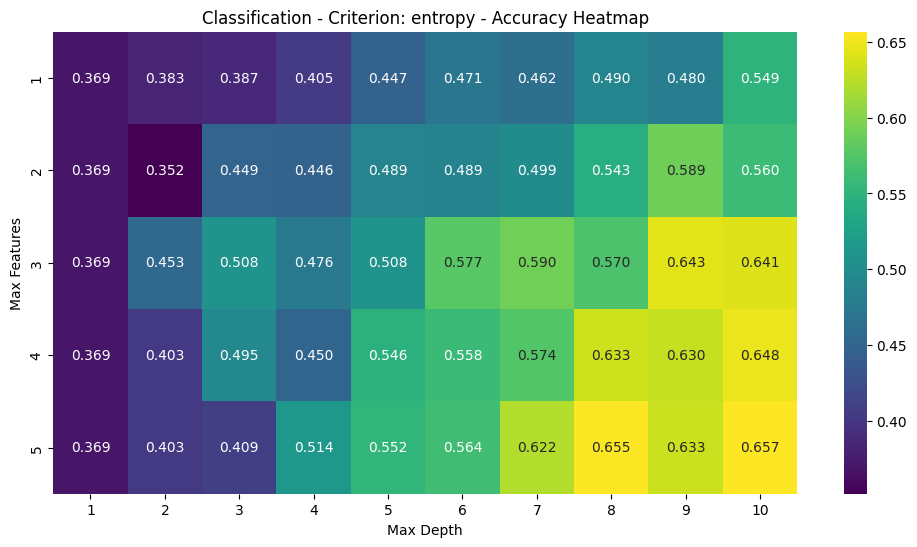

In [104]:
plot_tree_heatmap_body(X_train_clf, X_test_clf, y_train_clf, y_test_clf,
                       max_depth_range=range(1, 11),
                       max_features_range=range(1, 6),
                       task='classification',
                       criterion='entropy')


### Difference between Entropy and Gini on the Accuracy HeatMap are minimal (0.671 vs 0.657) and the best result is when max depth are 10.

### I reduced number of features because of Regression Dataset is to large and to complex for my used laptop (I waited 40 minutes without any result to see only one plot) 

## 3. Regression — criterion='friedman_mse'

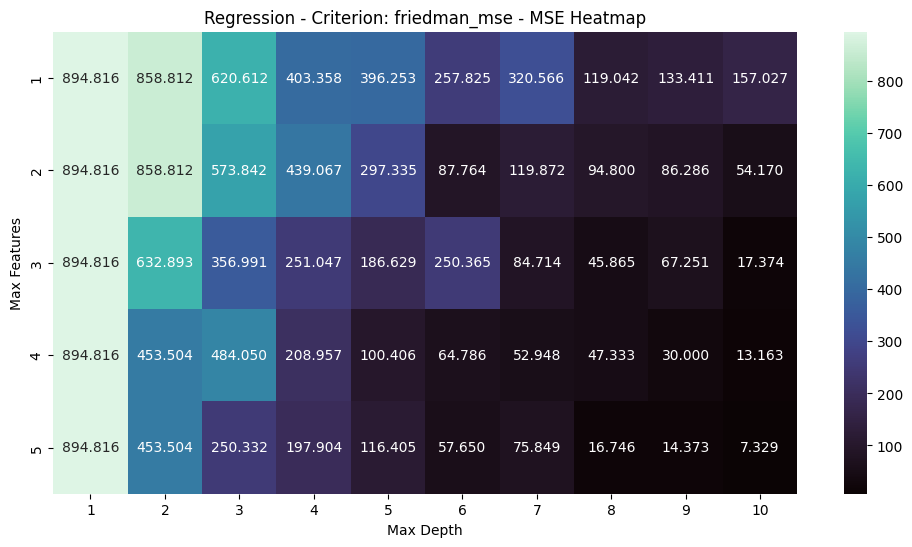

In [105]:
plot_tree_heatmap_body(X_train_reg, X_test_reg, y_train_reg, y_test_reg,
                       max_depth_range=range(1, 11),
                       max_features_range=range(1, 6),
                       task='regression',
                       criterion='friedman_mse')


### Higher values ​​for "Max Features" (4 or 5) seem to generally give a lower MSE, especially for greater depths. The lowest MSE value is 7.329, obtained at "Max Features" = 5 and "Max Depth" = 10. This is probably the best combination of hyperparameters tested to minimize model error and it result is much better than Poisson

## 4. Regression — criterion='poisson'
### Filter from negative numbers in target column on training and test dataset only for Poisson Criterion

In [10]:
mask_train = y_train_reg >= 0
X_train_reg_poisson = X_train_reg[mask_train]
y_train_reg_poisson = y_train_reg[mask_train]

mask_test = y_test_reg >= 0
X_test_reg_poisson = X_test_reg[mask_test]
y_test_reg_poisson = y_test_reg[mask_test]

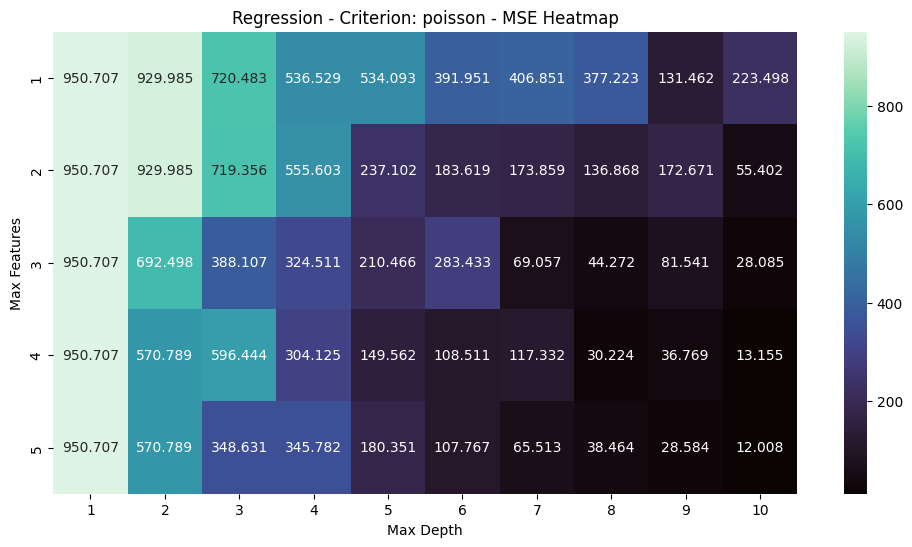

In [ ]:


plot_tree_heatmap_body(
    X_train_reg_poisson, X_test_reg_poisson,
    y_train_reg_poisson, y_test_reg_poisson,
    max_depth_range=range(1, 11),
    max_features_range=range(1, 6),
    task='regression',
    criterion='poisson'
)


### Poisson criterion accepts only positive values in target column but in my temperature_motor dataset are about 115.217 negative from 1.215.599 so my dataset is mostly valid for Poisson regression (~90.5% of values are usable).Above I've implemented the safest and cleanest approach.

# Criterion Comparison for Random Forest

In [19]:
from sklearn.utils import resample

def plot_rf_performance(X_train, X_test, y_train, y_test,
                        task='classification',
                        criteria=['gini', 'entropy'],
                        n_estimators_range=range(10, 110, 10),
                        random_state=42,
                        sample_frac=0.2):  # Use 20% by default

    # Subsample the training set for faster training
    X_sampled, y_sampled = resample(X_train, y_train,replace=False,n_samples=int(len(X_train) * sample_frac),random_state=random_state)

    plt.figure(figsize=(10, 6))
    scores = {}

    for criterion in criteria:
        metric_scores = []

        for n in n_estimators_range:
            if task == 'classification':
                model = RandomForestClassifier(n_estimators=n, criterion=criterion, random_state=random_state, n_jobs=-1)
            else:
                model = RandomForestRegressor(n_estimators=n, criterion=criterion, random_state=random_state, n_jobs=-1)

            model.fit(X_sampled, y_sampled)
            y_pred = model.predict(X_test)

            if task == 'classification':
                score = accuracy_score(y_test, y_pred)
            else:
                score = mean_squared_error(y_test, y_pred)

            metric_scores.append(score)

        scores[criterion] = metric_scores
        plt.plot(n_estimators_range, metric_scores, marker='o', label=f"Criterion: {criterion}")

    ylabel = 'Accuracy' if task == 'classification' else 'MSE'
    plt.title(f"Random Forest {task.capitalize()} Performance")
    plt.xlabel("Number of Estimators")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


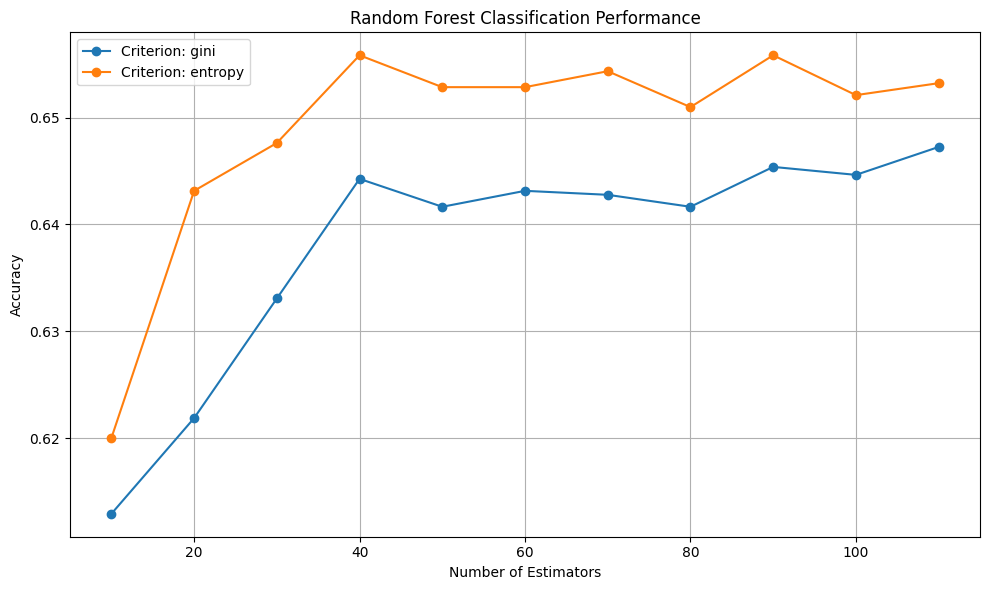

In [ ]:
plot_rf_performance(X_train_clf, X_test_clf, y_train_clf, y_test_clf,
                    task='classification',
                    criteria=['gini', 'entropy'],
                    n_estimators_range=range(10, 120, 10),
                    sample_frac=0.1)


### There are no big difference between these 2 measures, but I observed: Entropy from the start got higher performance without decreasing.Also I've read Gini could have values between [0 ; 0.5] but Entropy [0 ; 1] this makes Gini a little simpler but performance difference between them is often too small.

In [ ]:
plot_rf_performance(X_train_reg_poisson, X_test_reg_poisson, y_train_reg_poisson, y_test_reg_poisson,
                    task='regression',
                    criteria=['squared_error', 'absolute_error', 'poisson'],n_estimators_range=range(10, 60, 10),
                    sample_frac=0.1)

# I tried to use the same sample_frac for both classification and regression, but the regression model took too long to train.

# SVC && SVR Kernels Comparison

In [12]:
def plot_svm_performance(X_train, X_test, y_train, y_test,
                         task='classification',
                         kernels=['poly', 'rbf', 'sigmoid'],
                         C_values=np.logspace(-2, 2, 5),
                         random_state=42,
                         sample_frac=0.1):
    """
    Plotează performanța SVC/SVR pentru diferite kerneluri și valori ale lui C,
    folosind doar o fracțiune din date pentru performanță mai bună pe seturi mari.
    """
    # Eșantionează datele
    X_train_small, y_train_small = resample(X_train, y_train,
                                            n_samples=int(len(X_train) * sample_frac),
                                            random_state=random_state)
    X_test_small, y_test_small = resample(X_test, y_test,
                                          n_samples=int(len(X_test) * sample_frac),
                                          random_state=random_state)

    plt.figure(figsize=(10, 6))

    for kernel in kernels:
        scores = []

        for C in C_values:
            if task == 'classification':
                model = SVC(kernel=kernel, C=C, random_state=random_state)
            else:
                model = SVR(kernel=kernel, C=C)

            model.fit(X_train_small, y_train_small)
            y_pred = model.predict(X_test_small)

            if task == 'classification':
                score = accuracy_score(y_test_small, y_pred)
            else:
                score = mean_squared_error(y_test_small, y_pred)

            scores.append(score)

        plt.plot(C_values, scores, marker='o', label=f"Kernel: {kernel}")

    ylabel = 'Accuracy' if task == 'classification' else 'MSE'
    plt.xscale('log')
    plt.title(f"SVM {task.capitalize()} Performance (sampled {int(sample_frac*100)}%)")
    plt.xlabel("C (Regularization Parameter)")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



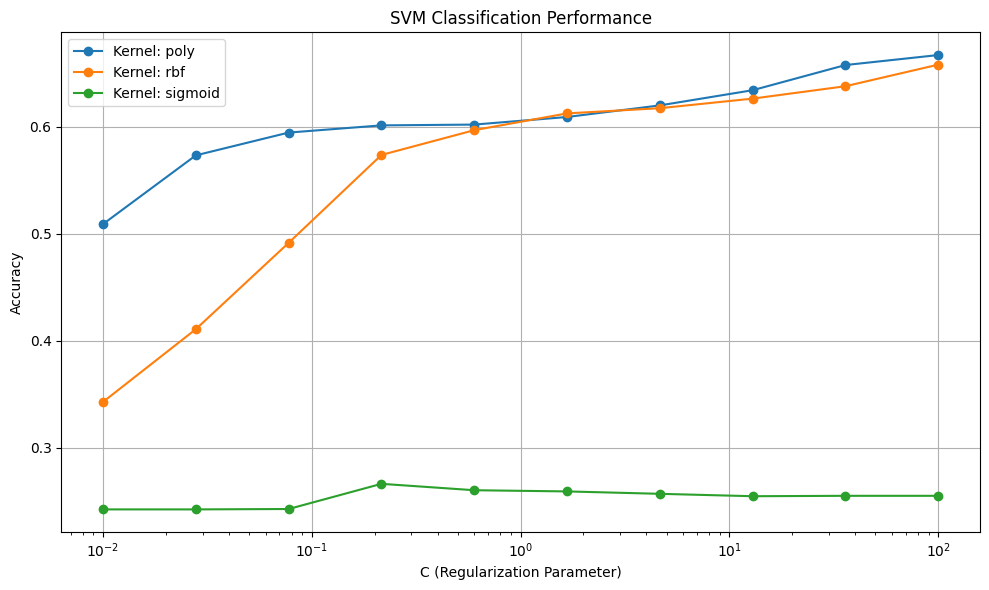

In [25]:
plot_svm_performance(X_train_clf, X_test_clf, y_train_clf, y_test_clf,
                     task='classification',
                     kernels=['poly', 'rbf', 'sigmoid'])


### Poly faster got better results but rbf reached the same good results and they are still increase.The best results are when Regularization Parameter is 100 here accuracy is about 0.68.At the same time Sigmoid Function give the worst results so it is not a good option to use it in the same situations.( I think it is all about sigmoid try to transform data between [-1 ; 1] and do not succed)


In [ ]:
plot_svm_performance(X_train_reg, X_test_reg, y_train_reg, y_test_reg,
                     task='regression',
                     kernels=['poly', 'rbf', 'sigmoid'],
                     sample_frac=0.05)



### I couldn't get a result but I think the result would have been something similar to the graphic above due to the unsuitable values ​​for the sigmoid function.It is too long and this result is only for ***sample_frac=0.05*** of all  dataset

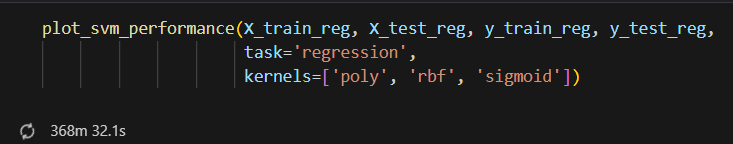


